## Project: Building a clustering algorithm based on transaction activity to predict whether an address belongs to an exchange, minor or Ico Wallet.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%run "/content/drive/MyDrive/ethereum_address_space_clustering/helper_functions.py"
%run "/content/drive/MyDrive/ethereum_address_space_clustering/tsne_plotter.py"
%run "/content/drive/MyDrive/ethereum_address_space_clustering/silhoutte_plotter.py"

### Load and Understand the dataset

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/ethereum_address_space_clustering/data/labeled_dataset.csv")

In [4]:
dataset.head()

,ethereum_address,ether_balance,unique_tokens,unique_transfers,mined_blocks,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,...,monthly_eth_recd,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used,Entity
0,0x0d0707963952f2fba59dd06f2b425ace40b492fe,443.735122,587,245377,0,479582,492072,2.437018e+06,5.081546,1.066724e+09,...,314641.354178,1.375943e+08,0,0,35.793619,841.981905,36.758222,91.156553,281,Exchange
1,0x6cc5f688a315f3dc28a7781717a9a798a59fda7b,1031.186386,865,472190,0,392467,312401,5.418637e+06,13.806606,2.131017e+09,...,556867.740550,2.250757e+08,0,0,77.365013,6066.634246,53.006365,469.834039,341,Exchange
2,0x564286362092d8e7936f0549571a803b203aaced,23892.712593,502,109404,0,615240,678,5.823040e+06,9.464664,3.502765e+09,...,537952.716735,3.228961e+08,0,0,39191.246677,60944.567004,43.327104,1286.006034,261,Exchange
3,0x0016eccecffc25b94050187017eb59fa05c029aa,126.407467,54,6180,0,2998,481,4.479533e+03,1.494174,1.205682e+06,...,745.774408,2.516832e+05,0,0,32761.102083,116946.601644,5212.212212,19082.175526,40,NaN
4,0xbe708d227f6dfa0b8f2698bf543b949dfe4e28fb,269.029806,202,1462,0,10164,243,2.077182e+04,2.043666,4.969486e+06,...,38.314152,1.370181e+04,0,0,77338.574380,178129.840874,1845.206238,6596.557607,166,NaN


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6057 entries, 0 to 6056
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ethereum_address             6057 non-null   object 
 1   ether_balance                6057 non-null   float64
 2   unique_tokens                6057 non-null   int64  
 3   unique_transfers             6057 non-null   int64  
 4   mined_blocks                 6057 non-null   int64  
 5   outgoing_txns                6057 non-null   int64  
 6   incoming_txns                6057 non-null   int64  
 7   total_eth_sent               6057 non-null   float64
 8   avg_eth_sent                 6057 non-null   float64
 9   total_usd_sent               6057 non-null   float64
 10  avg_usd_sent                 6057 non-null   float64
 11  total_eth_recd               6057 non-null   float64
 12  avg_eth_recd                 6057 non-null   float64
 13  total_usd_recd    

In [6]:
dataset["Entity"].value_counts()

Entity
Exchange    53
Mining      51
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(


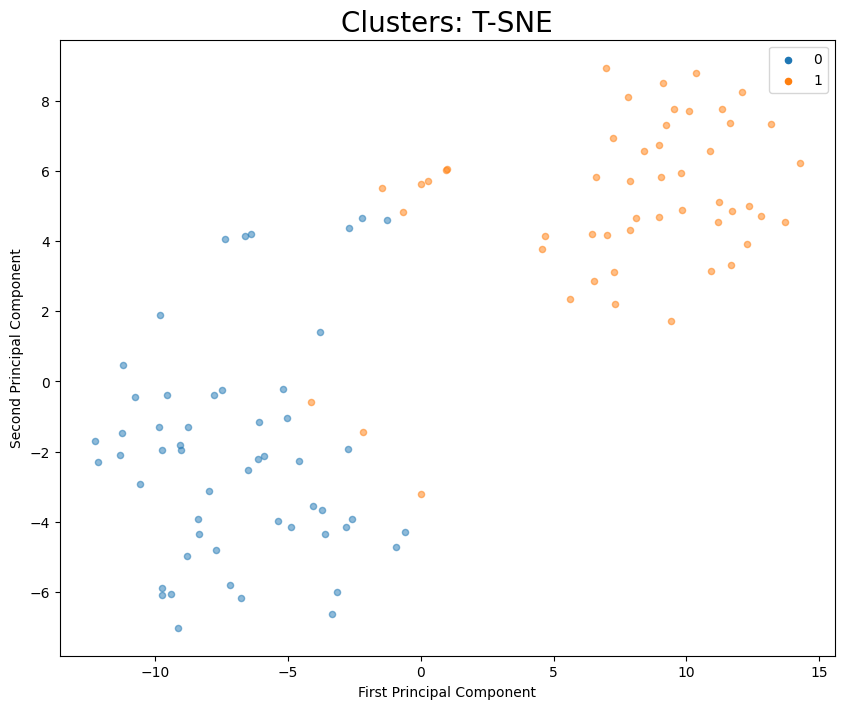

In [7]:
# Plot only labeled datapoints

# Select only the rows where the label ("Entity") is given and remove ethereum_address, label and cluster
data_with_labels = dataset[dataset["Entity"].notnull()].iloc[:, 1:-2]
pipe, data_with_labels = data_pipeline(data_with_labels)
cl_labels = make_cluster(data_with_labels, n_clusters=2, n_init=20, max_iter=500)
tsne_results_labels = calc_tsne(data_with_labels, n_components=2, perplexity=20, n_iter=500, learning_rate=100)
plot_tsne(cl_labels.labels_, tsne_results_labels)

### Pre-process the dataset

In [8]:
pipeline, processed_data = data_pipeline(dataset)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(


### Make Clusters

In [9]:
tsne_results = calc_tsne(processed_data, n_components=2, perplexity=20, n_iter=500, learning_rate=100)

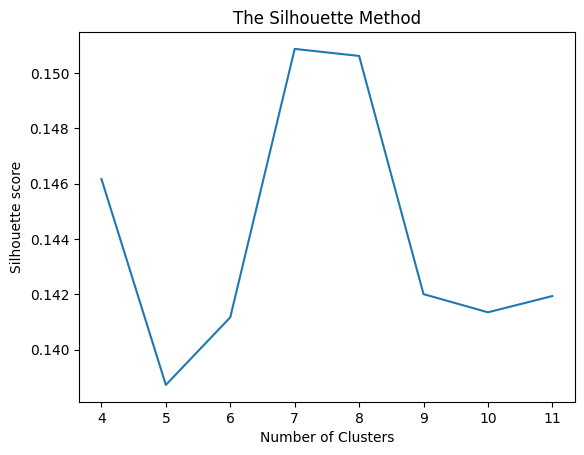

In [10]:
plot_silhouette_scores(processed_data, 4, 12)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.14950268210094353


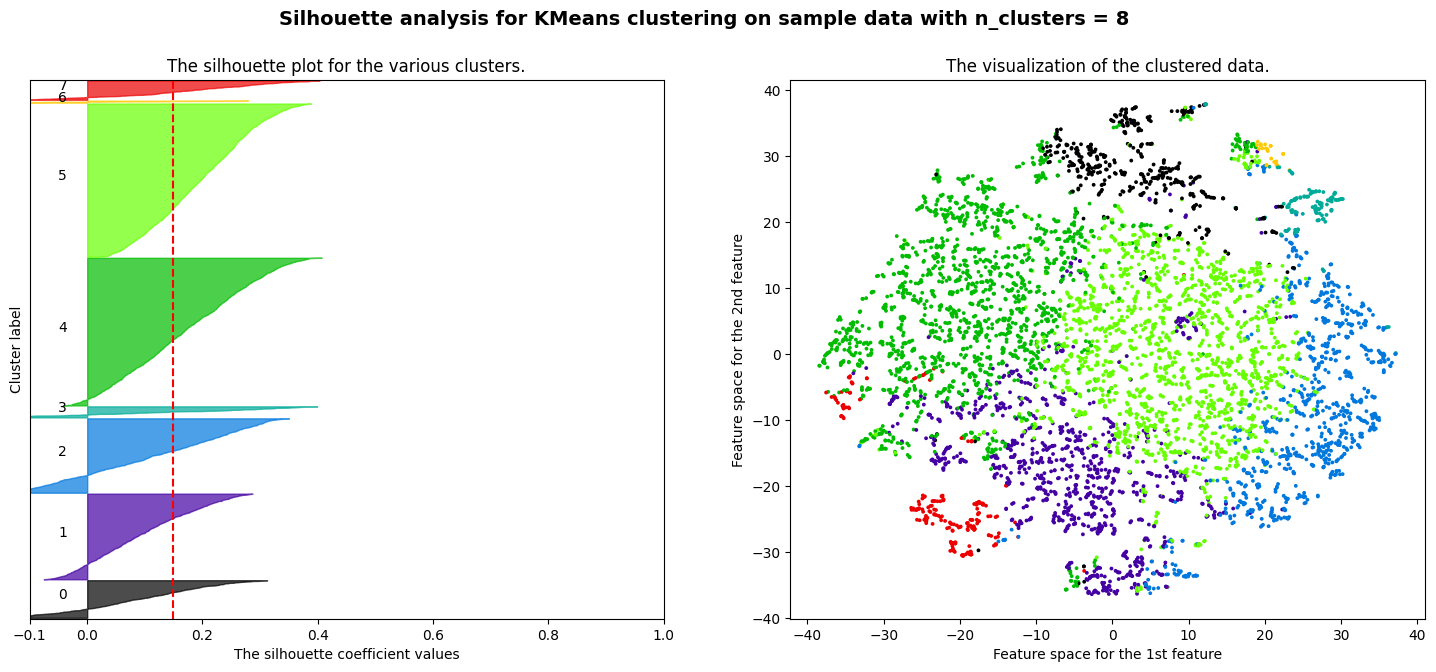

In [11]:
range_n_clusters = [8]
sils = silhouette_plotter(processed_data, range_n_clusters, tsne_results)

In [12]:
clusters = make_cluster(processed_data, n_clusters=8, n_init=20, max_iter=500)
print(np.unique(clusters.labels_))

[0 1 2 3 4 5 6 7]


### Assign addresses to its corresponding clusters and see how labeled data is distributed to the clusters

In [13]:
dataset_with_clusters = assign_cluster_to_data(dataset, clusters.labels_)

In [14]:
dataset_with_clusters["cluster"].value_counts()

cluster
2    1751
0    1716
3     966
5     809
6     437
4     220
1     146
7      12
Name: count, dtype: int64

In [15]:
categories = ("Exchange", "Mining")
colors = ("blue", "red")

cluster_types = {}
for categ in categories:
    cluster_types[categ] = find_category_of_cluster(clusters, dataset_with_clusters, categ)

cl_types = list(cluster_types.values())

Exchange
Cluster num: 0, num of addresses: 1, cluster size: 1716, lebel density: 0.05827505827505827
Cluster num: 1, num of addresses: 47, cluster size: 146, lebel density: 32.19178082191781
Cluster num: 2, num of addresses: 1, cluster size: 1751, lebel density: 0.05711022272986865
Cluster num: 3, num of addresses: 0, cluster size: 966, lebel density: 0.0
Cluster num: 4, num of addresses: 0, cluster size: 220, lebel density: 0.0
Cluster num: 5, num of addresses: 3, cluster size: 809, lebel density: 0.3708281829419036
Cluster num: 6, num of addresses: 1, cluster size: 437, lebel density: 0.2288329519450801
Cluster num: 7, num of addresses: 0, cluster size: 12, lebel density: 0.0
Mining
Cluster num: 0, num of addresses: 10, cluster size: 1716, lebel density: 0.5827505827505828
Cluster num: 1, num of addresses: 0, cluster size: 146, lebel density: 0.0
Cluster num: 2, num of addresses: 6, cluster size: 1751, lebel density: 0.34266133637921187
Cluster num: 3, num of addresses: 0, cluster si

### Visualize and interpret the results

In [16]:
dflabel = dataset[dataset["Entity"].notnull()]
dflabel = dflabel[["ethereum_address", "Entity"]]
dflabel.head()

,ethereum_address,Entity
0,0x0d0707963952f2fba59dd06f2b425ace40b492fe,Exchange
1,0x6cc5f688a315f3dc28a7781717a9a798a59fda7b,Exchange
2,0x564286362092d8e7936f0549571a803b203aaced,Exchange
6,0x0681d8db095565fe8a346fa0277bffde9c0edbbf,Exchange
7,0x1062a747393198f70f71ec65a582423dba7e5ab3,Exchange


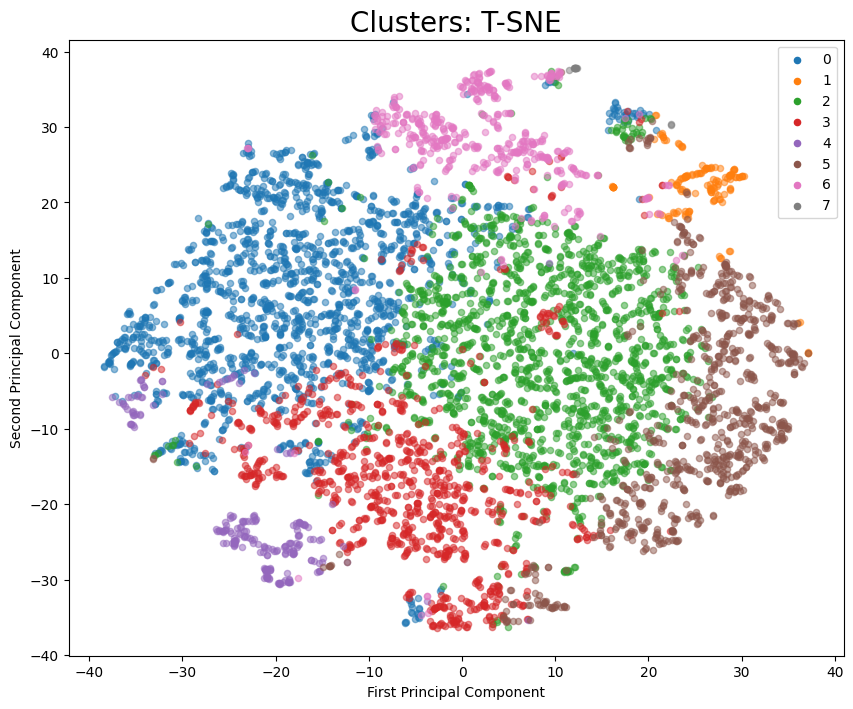

In [17]:
plot_tsne(clusters.labels_, tsne_results)

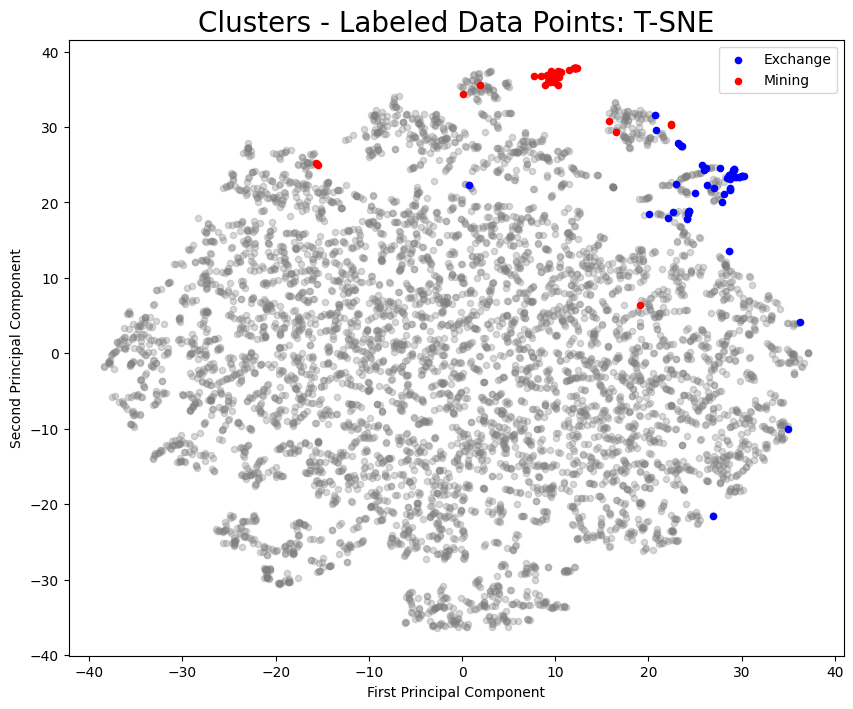

In [18]:
plot_tsne_with_labels(tsne_results, dataset, dflabel, categories, colors)

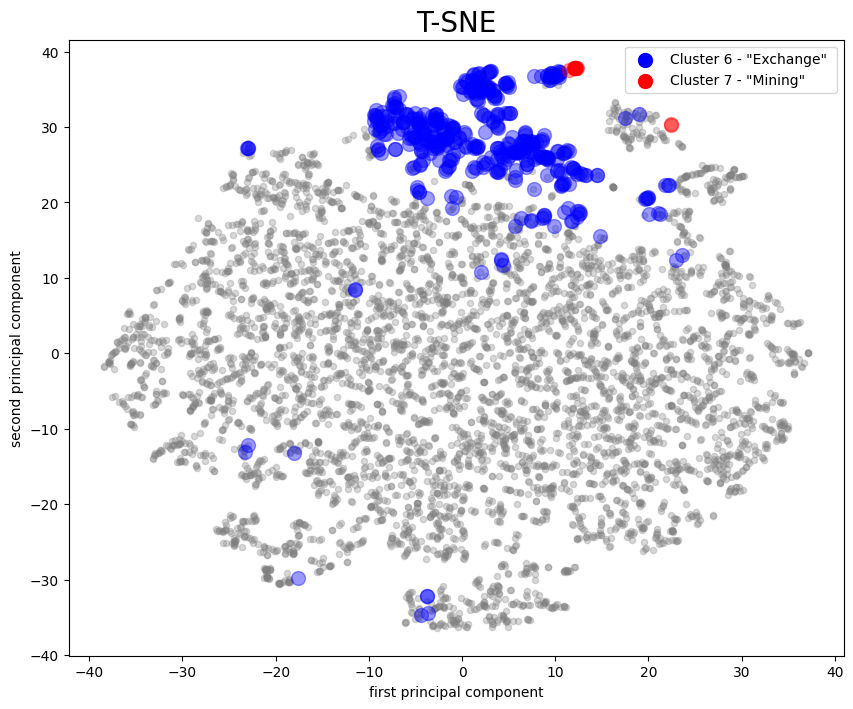

In [19]:
plot_tsne_with_labeled_clusters(tsne_results, clusters, cl_types, categories, colors)

In [20]:
# plot_all(tsne_results, clusters, dataset, dflabel, cl_types, categories, colors)

In [21]:
for clust in np.unique(clusters.labels_):
    print('cluster {}'.format(clust))
    print('labelled points: {}'.format(np.sum([dataset_with_clusters["cluster"]==clust])))
    print('total points: {}'.format(np.sum(clusters.labels_==clust)))
    # print(dataset_with_clusters[dataset_with_clusters['cluster']==clust][['label','category']])
    print('\n')

cluster 0
labelled points: 1716
total points: 1716


cluster 1
labelled points: 146
total points: 146


cluster 2
labelled points: 1751
total points: 1751


cluster 3
labelled points: 966
total points: 966


cluster 4
labelled points: 220
total points: 220


cluster 5
labelled points: 809
total points: 809


cluster 6
labelled points: 437
total points: 437


cluster 7
labelled points: 12
total points: 12


